# Hava Kalitesi ve Sağlık Etkisi Veri Seti ile Sınıflandırma

238802039 Elif Pınar Arpacı

Hava Kalitesi Metrikleri

AQI: Hava Kalitesi İndeksi, havanın şu an ne kadar kirli olduğunu veya gelecekte ne kadar kirli olacağını ölçen bir indeks

PM10: 10 mikrometreden daha küçük partikül maddelerin konsantrasyonu (μg/m³)

PM2_5: 2.5 mikrometreden daha küçük partikül maddelerin konsantrasyonu (μg/m³)

NO2: Azot dioksit konsantrasyonu (ppb)

SO2: Kükürt dioksit konsantrasyonu (ppb)

O3: Ozon konsantrasyonu (ppb)

Hava Durumu Koşulları

Temperature: Sıcaklık (°C)

Humidity: Nem yüzdesi (%)

WindSpeed: Rüzgar hızı (m/s)

Sağlık Etki Metrikleri

RespiratoryCases: Bildirilen solunum vakaları sayısı

CardiovascularCases: Bildirilen kardiyovasküler vakalar sayısı

HospitalAdmissions: Bildirilen hastane yatışları sayısı

Hedef Değişken: Sağlık Etki Sınıfı

HealthImpactScore: Hava kalitesi ve diğer ilgili faktörlere dayanarak genel sağlık etkisini gösteren skor (0'dan 100'e kadar)

HealthImpactClass: Sağlık etkisi skoruna dayalı olarak sağlık etkisinin sınıflandırılması:

0: 'Çok Yüksek' (HealthImpactScore >= 80)

1: 'Yüksek' (60 <= HealthImpactScore < 80)

2: 'Orta' (40 <= HealthImpactScore < 60)

3: 'Düşük' (20 <= HealthImpactScore < 40)

4: 'Çok Düşük' (HealthImpactScore < 20)

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [179]:
df=pd.read_csv('air_quality_health_impact_data.csv')

In [180]:
df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [181]:
df.shape

(5811, 15)

In [182]:
df.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [184]:
df.corr()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
RecordID,1.000000,-0.003768,0.022260,0.022816,0.010694,-0.021524,-0.000874,0.004080,-0.001449,0.018529,-0.014545,-0.030537,-0.008299,0.015786,0.198229
AQI,-0.003768,1.000000,0.023127,0.005890,0.007836,-0.006644,0.002339,0.004185,-0.004217,-0.018816,0.009302,0.009158,-0.013592,0.614560,-0.348106
PM10,0.022260,0.023127,1.000000,-0.012193,0.008487,-0.007177,-0.004411,-0.017561,-0.017290,-0.018959,-0.001315,0.015582,-0.009076,0.182600,-0.108271
PM2_5,0.022816,0.005890,-0.012193,1.000000,0.005564,0.015894,0.006070,-0.001978,0.006720,0.009041,0.025244,0.017312,-0.023123,0.220347,-0.152407
NO2,0.010694,0.007836,0.008487,0.005564,1.000000,-0.019979,-0.014910,0.006971,-0.011100,-0.001398,0.019849,-0.005012,-0.002859,0.124435,-0.090387
SO2,-0.021524,-0.006644,-0.007177,0.015894,-0.019979,1.000000,-0.004319,-0.022458,0.000910,-0.001617,0.011130,-0.002672,-0.010546,0.015535,-0.008364
O3,-0.000874,0.002339,-0.004411,0.006070,-0.014910,-0.004319,1.000000,-0.001257,0.003982,-0.002596,-0.010068,0.001753,-0.014293,0.157940,-0.110093
Temperature,0.004080,0.004185,-0.017561,-0.001978,0.006971,-0.022458,-0.001257,1.000000,-0.000233,0.000887,0.009394,0.009249,0.007943,-0.010556,0.005969
Humidity,-0.001449,-0.004217,-0.017290,0.006720,-0.011100,0.000910,0.003982,-0.000233,1.000000,0.021027,0.008691,-0.024617,-0.004865,0.000662,-0.006715
WindSpeed,0.018529,-0.018816,-0.018959,0.009041,-0.001398,-0.001617,-0.002596,0.000887,0.021027,1.000000,-0.010553,0.003715,-0.006454,-0.025447,0.005999


In [185]:
df.tail()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
5806,5807,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,5808,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,5809,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,5810,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0
5810,5811,83.269257,82.216262,119.968244,193.440691,79.849177,28.681885,18.239090,77.096194,16.410320,14,2,2,81.668298,0.0


In [186]:
X = dataset.drop('HealthImpactClass', axis=1)
y = dataset['HealthImpactClass']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)

In [188]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression

In [189]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log_reg, zero_division=1))

Logistic Regression Accuracy: 0.8409286328460877
Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       966
         1.0       0.53      0.72      0.61       111
         2.0       0.57      0.45      0.50        56
         3.0       0.04      0.14      0.07        14
         4.0       0.16      0.62      0.26        16

    accuracy                           0.84      1163
   macro avg       0.46      0.57      0.48      1163
weighted avg       0.91      0.84      0.87      1163



Random Forest

In [192]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train_scaled, y_train)

y_pred_rf = rf_clf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9630266552020637
Random Forest Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       966
         1.0       0.92      0.95      0.93       111
         2.0       0.85      0.80      0.83        56
         3.0       0.64      0.64      0.64        14
         4.0       0.00      0.00      0.00        16

    accuracy                           0.96      1163
   macro avg       0.68      0.68      0.68      1163
weighted avg       0.95      0.96      0.96      1163



Decision Tree


In [193]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9630266552020637
Decision Tree Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       966
         1.0       0.95      0.91      0.93       111
         2.0       0.87      0.84      0.85        56
         3.0       0.50      0.64      0.56        14
         4.0       0.30      0.19      0.23        16

    accuracy                           0.96      1163
   macro avg       0.72      0.71      0.71      1163
weighted avg       0.96      0.96      0.96      1163



K-Nearest Neighbors


In [194]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)

print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("K-Nearest Neighbors Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 0.8581255374032674
K-Nearest Neighbors Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95       966
         1.0       0.44      0.35      0.39       111
         2.0       0.47      0.14      0.22        56
         3.0       0.08      0.07      0.07        14
         4.0       0.17      0.06      0.09        16

    accuracy                           0.86      1163
   macro avg       0.41      0.32      0.34      1163
weighted avg       0.83      0.86      0.84      1163



Support Vector Machine

In [195]:
svm_clf = SVC(class_weight='balanced')
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)

print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Support Vector Machine Report:\n", classification_report(y_test, y_pred_svm, zero_division=1))

Support Vector Machine Accuracy: 0.8925193465176269
Support Vector Machine Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       966
         1.0       0.66      0.88      0.75       111
         2.0       0.61      0.68      0.64        56
         3.0       0.23      0.50      0.31        14
         4.0       0.06      0.06      0.06        16

    accuracy                           0.89      1163
   macro avg       0.51      0.61      0.55      1163
weighted avg       0.92      0.89      0.90      1163



Naive Bayes


In [196]:
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train)
y_pred_nb = nb_clf.predict(X_test_scaled)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb, zero_division=1))

Naive Bayes Accuracy: 0.8907996560619088
Naive Bayes Report:
               precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       966
         1.0       0.56      0.94      0.70       111
         2.0       0.75      0.54      0.63        56
         3.0       1.00      0.00      0.00        14
         4.0       0.33      0.06      0.11        16

    accuracy                           0.89      1163
   macro avg       0.72      0.49      0.48      1163
weighted avg       0.91      0.89      0.89      1163



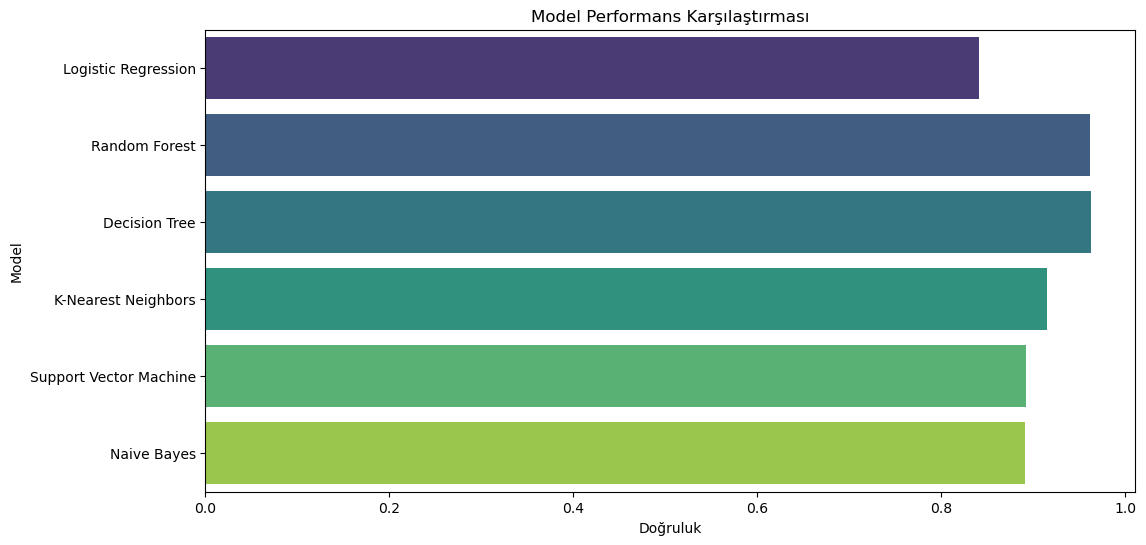

In [197]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(class_weight='balanced'),
    'Naive Bayes': GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': accuracy})

results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Performans Karşılaştırması')
plt.xlabel('Doğruluk')
plt.ylabel('Model')
plt.show()

Bagging 

In [198]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=58)
bagging_clf.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_clf.predict(X_test_scaled)

print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging Classifier Report:\n", classification_report(y_test, y_pred_bagging, zero_division=1))

Bagging Classifier Accuracy: 0.9638865004299226
Bagging Classifier Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       966
         1.0       0.91      0.93      0.92       111
         2.0       0.85      0.82      0.84        56
         3.0       0.50      0.64      0.56        14
         4.0       0.33      0.12      0.18        16

    accuracy                           0.96      1163
   macro avg       0.72      0.70      0.70      1163
weighted avg       0.96      0.96      0.96      1163



Boosting

In [204]:
boosting_clf = GradientBoostingClassifier(n_estimators=100, random_state=58)
boosting_clf.fit(X_train_scaled, y_train)
y_pred_boosting = boosting_clf.predict(X_test_scaled)

print("Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("Boosting Classifier Report:\n", classification_report(y_test, y_pred_boosting, zero_division=1))

Boosting Classifier Accuracy: 0.9621668099742047
Boosting Classifier Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       966
         1.0       0.90      0.94      0.92       111
         2.0       0.90      0.80      0.85        56
         3.0       0.54      0.50      0.52        14
         4.0       0.27      0.19      0.22        16

    accuracy                           0.96      1163
   macro avg       0.72      0.68      0.70      1163
weighted avg       0.96      0.96      0.96      1163



Stacking

In [205]:
base_models = [
    ('log_reg', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('rf', RandomForestClassifier(class_weight='balanced')),
    ('dt', DecisionTreeClassifier(class_weight='balanced')),
    ('knn', KNeighborsClassifier())
]

meta_model = LogisticRegression(max_iter=1000, class_weight='balanced')

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_clf.fit(X_train_scaled, y_train)
y_pred_stacking = stacking_clf.predict(X_test_scaled)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Stacking Classifier Report:\n", classification_report(y_test, y_pred_stacking, zero_division=1))

Stacking Classifier Accuracy: 0.9613069647463457
Stacking Classifier Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       966
         1.0       1.00      0.91      0.95       111
         2.0       0.96      0.77      0.85        56
         3.0       0.38      0.64      0.47        14
         4.0       0.23      0.50      0.31        16

    accuracy                           0.96      1163
   macro avg       0.71      0.76      0.72      1163
weighted avg       0.98      0.96      0.97      1163



Voting Classifier

Farklı modellerin tahminlerini birleştirerek sonuçları çoğunluk oyuna göre karar verir.

In [206]:
voting_clf = VotingClassifier(estimators=[
    ('log_reg', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('rf', RandomForestClassifier(class_weight='balanced')),
    ('dt', DecisionTreeClassifier(class_weight='balanced')),
    ('knn', KNeighborsClassifier()),
    ('svm', SVC(probability=True, class_weight='balanced'))  
], voting='soft')

voting_clf.fit(X_train_scaled, y_train)

y_pred_voting = voting_clf.predict(X_test_scaled)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Voting Classifier Report:\n", classification_report(y_test, y_pred_voting, zero_division=1))

Voting Classifier Accuracy: 0.9578675838349097
Voting Classifier Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       966
         1.0       0.92      0.93      0.92       111
         2.0       0.89      0.73      0.80        56
         3.0       0.54      0.50      0.52        14
         4.0       0.33      0.06      0.11        16

    accuracy                           0.96      1163
   macro avg       0.73      0.64      0.67      1163
weighted avg       0.95      0.96      0.95      1163



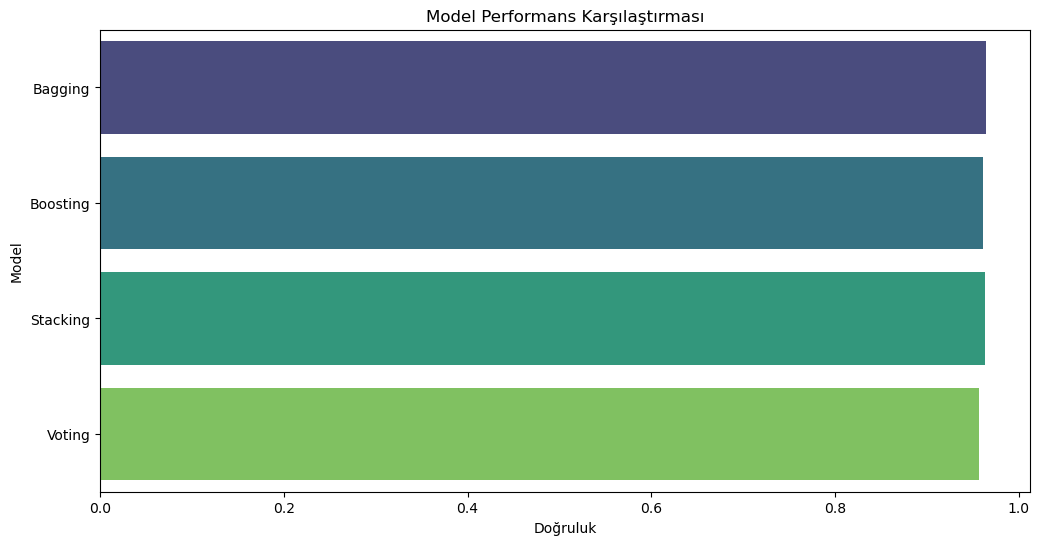

In [207]:
models = {
    'Bagging': BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=58),
    'Boosting': GradientBoostingClassifier(n_estimators=50, random_state=58),
    'Stacking': StackingClassifier(
        estimators=[
            ('log_reg', LogisticRegression(max_iter=1000, class_weight='balanced')),
            ('rf', RandomForestClassifier(class_weight='balanced')),
            ('dt', DecisionTreeClassifier(class_weight='balanced')),
            ('knn', KNeighborsClassifier())
        ],
        final_estimator=LogisticRegression()
    ),
    'Voting': VotingClassifier(
        estimators=[
            ('log_reg', LogisticRegression(max_iter=1000, class_weight='balanced')),
            ('rf', RandomForestClassifier(class_weight='balanced')),
            ('dt', DecisionTreeClassifier(class_weight='balanced')),
            ('knn', KNeighborsClassifier()),
            ('svm', SVC(probability=True, class_weight='balanced'))
        ],
        voting='soft'
    )
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Performans Karşılaştırması')
plt.xlabel('Doğruluk')
plt.ylabel('Model')
plt.show()

Decision Tree vs Bagging Classifier

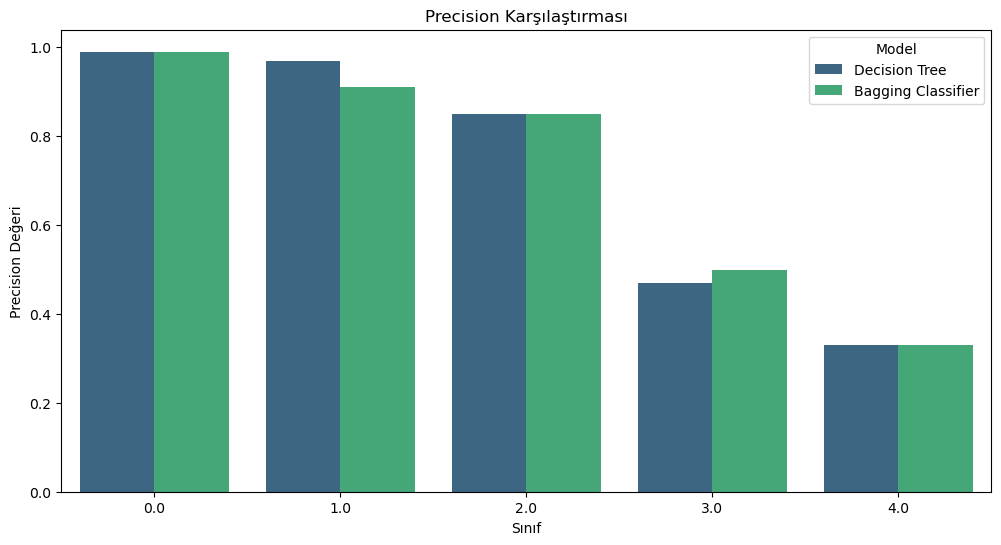

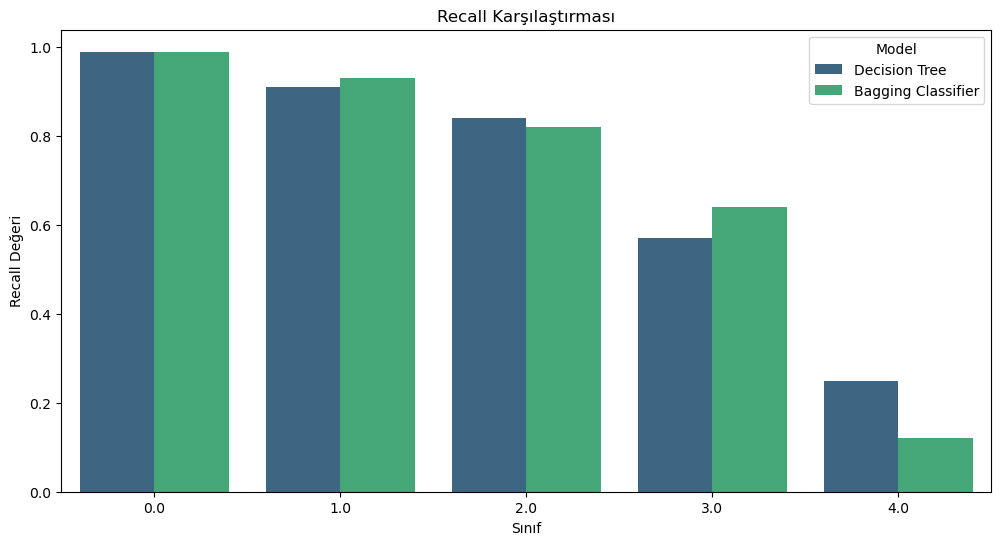

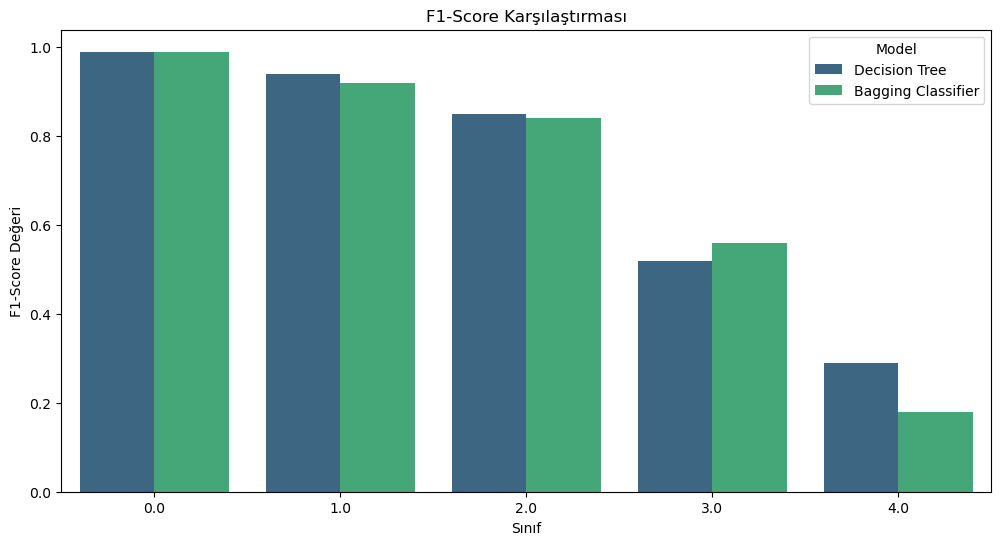

In [208]:
data = {
    'Model': ['Decision Tree'] * 5 + ['Bagging Classifier'] * 5,
    'Class': ['0.0', '1.0', '2.0', '3.0', '4.0'] * 2,
    'Precision': [
        0.99, 0.97, 0.85, 0.47, 0.33,  #Decision Tree
        0.99, 0.91, 0.85, 0.50, 0.33   #Bagging 
    ],
    'Recall': [
        0.99, 0.91, 0.84, 0.57, 0.25,  #Decision Tree
        0.99, 0.93, 0.82, 0.64, 0.12   #Bagging 
    ],
    'F1-Score': [
        0.99, 0.94, 0.85, 0.52, 0.29,  #Decision Tree
        0.99, 0.92, 0.84, 0.56, 0.18   #Bagging 
    ]
}

df = pd.DataFrame(data)
metrics = ['Precision', 'Recall', 'F1-Score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Class', y=metric, hue='Model', data=df, palette='viridis')
    plt.title(f'{metric} Karşılaştırması')
    plt.xlabel('Sınıf')
    plt.ylabel(f'{metric} Değeri')
    plt.legend(title='Model')
    plt.show()

Sonuç

Decision Tree ve Bagging Classifier, iki model de yüksek doğruluk oranı sağlıyor. 